In [1]:
import numpy as np
from numpy import mean, argmax
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, recall_score, precision_recall_curve, f1_score, auc, precision_score, roc_curve
import time
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

import psutil
import tracemalloc

from matplotlib import pyplot
from matplotlib.pyplot import figure

import platform
import cpuinfo

In [2]:
china_mean_noOutliers = pd.read_csv('C:/Users/boont/Desktop/szakdoga/sorted_with_mean_std.csv')
china_mean_noOutliers = china_mean_noOutliers.drop(['Unnamed: 0'], axis = 1)
china_mean_noOutliers
china_mean_noOutliers = china_mean_noOutliers.apply(lambda x: x.fillna(x.mean()),axis=0)
china_mean_noOutliers

,FLAG,MEAN,STD,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00,2014-01-06 00:00:00,2014-01-07 00:00:00,...,2016-10-22 00:00:00,2016-10-23 00:00:00,2016-10-24 00:00:00,2016-10-25 00:00:00,2016-10-26 00:00:00,2016-10-27 00:00:00,2016-10-28 00:00:00,2016-10-29 00:00:00,2016-10-30 00:00:00,2016-10-31 00:00:00
0,1,13.898342,8.843958,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,1,0.000000,0.000000,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,9.921390,6.822524,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,1,14.612055,11.422513,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,1,8.249738,5.942354,2.900000,5.640000,6.990000,3.320000,3.610000,5.350000,4.730000,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39514,0,4.147203,1.583176,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
39515,0,4.892765,1.581757,2.700000,0.000000,0.000000,5.720000,6.050000,5.810000,3.070000,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
39516,0,1.340594,1.880989,0.580000,1.160000,0.920000,0.980000,1.540000,1.380000,0.890000,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
39517,0,17.333685,6.776731,16.890000,15.150000,19.280000,17.190000,16.800000,17.480000,17.860000,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [3]:
X_full_mean_noOutliers = china_mean_noOutliers.drop(['FLAG'], axis = 1)
Y_full_mean_noOutliers = china_mean_noOutliers['FLAG']

In [4]:
X_train_full_mean_noOutliers, X_test_full_mean_noOutliers, Y_train_full_mean_noOutliers, Y_test_full_mean_noOutliers = train_test_split(X_full_mean_noOutliers, Y_full_mean_noOutliers, test_size = 0.2, random_state = 42)

# default

In [5]:
rfc_default = RandomForestClassifier()

In [6]:
start = time.time()
rfc_default.fit(X_train_full_mean_noOutliers,Y_train_full_mean_noOutliers)
stop = time.time()
print(f"Training time: {stop - start}sec")

C:\Users\boont\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training time: 21.094966411590576sec


In [7]:
# predictions
rfc_default_y_pred_full = rfc_default.predict(X_test_full_mean_noOutliers)
print(f"Accuracy: {accuracy_score(Y_test_full_mean_noOutliers, rfc_default_y_pred_full)}")
print(f"Recall: {recall_score(Y_test_full_mean_noOutliers, rfc_default_y_pred_full, average='macro')}")
print(confusion_matrix(Y_test_full_mean_noOutliers, rfc_default_y_pred_full))
print(classification_report(Y_test_full_mean_noOutliers, rfc_default_y_pred_full))
print(f"AUC: {roc_auc_score(Y_test_full_mean_noOutliers, rfc_default.predict_proba(X_test_full_mean_noOutliers)[:,1])}")

Accuracy: 0.9182692307692307
Recall: 0.5906286183294494
[[7121   61]
 [ 585  137]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7182
           1       0.69      0.19      0.30       722

    accuracy                           0.92      7904
   macro avg       0.81      0.59      0.63      7904
weighted avg       0.90      0.92      0.90      7904

AUC: 0.7703776793476458


In [8]:
rfc_probs_default = rfc_default.predict_proba(X_test_full_mean_noOutliers)
rfc_probs_default = rfc_probs_default[:,1]
rfc_precision_default, rfc_recall_default, rfc_threshold_default = precision_recall_curve(Y_test_full_mean_noOutliers, rfc_probs_default)
rfc_f1_default, rfc_auc_default = f1_score(Y_test_full_mean_noOutliers, rfc_default_y_pred_full), auc(rfc_recall_default, rfc_precision_default)

# default + smote

In [9]:
tracemalloc.start()
start = time.time()
counter = Counter(Y_train_full_mean_noOutliers)
print('Before', counter)
smt = SMOTE()

X_train_oversampled_sm_full, Y_train_sm_full = smt.fit_resample(X_train_full_mean_noOutliers, Y_train_full_mean_noOutliers)
X_train_sm_full = pd.DataFrame(X_train_oversampled_sm_full, columns=X_train_full_mean_noOutliers.columns)

counter = Counter(Y_train_sm_full)
print('After', counter)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Before Counter({0: 28883, 1: 2732})
After Counter({0: 28883, 1: 28883})
Training time: 23.733459949493408sec
Current memory usage is 504.210157MB; Peak was 983.104229MB


In [10]:
tracemalloc.start()

start = time.time()
rfc_default.fit(X_train_sm_full,Y_train_sm_full)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Training time: 21.77943706512451sec
Current memory usage is 0.164498MB; Peak was 244.068816MB


In [11]:
# predictions
rfc_default_y_pred_sm_full = rfc_default.predict(X_test_full_mean_noOutliers)
print(f"Accuracy: {accuracy_score(Y_test_full_mean_noOutliers, rfc_default_y_pred_sm_full)}")
print(f"Recall: {recall_score(Y_test_full_mean_noOutliers, rfc_default_y_pred_sm_full, average='macro')}")
print(confusion_matrix(Y_test_full_mean_noOutliers, rfc_default_y_pred_sm_full))
print(classification_report(Y_test_full_mean_noOutliers, rfc_default_y_pred_sm_full))
print(f"AUC: {roc_auc_score(Y_test_full_mean_noOutliers, rfc_default.predict_proba(X_test_full_mean_noOutliers)[:,1])}")

Accuracy: 0.8933451417004049
Recall: 0.64418722244207
[[6816  366]
 [ 477  245]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7182
           1       0.40      0.34      0.37       722

    accuracy                           0.89      7904
   macro avg       0.67      0.64      0.65      7904
weighted avg       0.89      0.89      0.89      7904

AUC: 0.7565145358008749


In [12]:
rfc_probs_default_smt = rfc_default.predict_proba(X_test_full_mean_noOutliers)
rfc_probs_default_smt = rfc_probs_default_smt[:,1]
rfc_precision_default_smt, rfc_recall_default_smt, rfc_threshold_default_smt = precision_recall_curve(Y_test_full_mean_noOutliers, rfc_probs_default_smt)
rfc_f1_default_smt, rfc_auc_default_smt = f1_score(Y_test_full_mean_noOutliers, rfc_default_y_pred_sm_full), auc(rfc_recall_default_smt, rfc_precision_default_smt)

# tuned

In [13]:
rfc_tuned = RandomForestClassifier(n_estimators = 100, max_depth = 50, min_samples_split = 5, min_samples_leaf = 2)

In [14]:
start = time.time()
rfc_tuned.fit(X_train_full_mean_noOutliers,Y_train_full_mean_noOutliers)
stop = time.time()
print(f"Training time: {stop - start}sec")

Training time: 157.06199860572815sec


In [15]:
# predictions
rfc_tuned_y_pred_full = rfc_tuned.predict(X_test_full_mean_noOutliers)
print(f"Accuracy: {accuracy_score(Y_test_full_mean_noOutliers, rfc_tuned_y_pred_full)}")
print(f"Recall: {recall_score(Y_test_full_mean_noOutliers, rfc_tuned_y_pred_full, average='macro')}")
print(confusion_matrix(Y_test_full_mean_noOutliers, rfc_tuned_y_pred_full))
print(classification_report(Y_test_full_mean_noOutliers, rfc_tuned_y_pred_full))
print(f"AUC: {roc_auc_score(Y_test_full_mean_noOutliers, rfc_tuned.predict_proba(X_test_full_mean_noOutliers)[:,1])}")

Accuracy: 0.9221912955465587
Recall: 0.5890493778305412
[[7158   24]
 [ 591  131]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7182
           1       0.85      0.18      0.30       722

    accuracy                           0.92      7904
   macro avg       0.88      0.59      0.63      7904
weighted avg       0.92      0.92      0.90      7904

AUC: 0.8219574598237668


In [16]:
rfc_probs_tuned = rfc_tuned.predict_proba(X_test_full_mean_noOutliers)
rfc_probs_tuned = rfc_probs_tuned[:,1]
rfc_precision_tuned, rfc_recall_tuned, rfc_threshold_tuned = precision_recall_curve(Y_test_full_mean_noOutliers, rfc_probs_tuned)
rfc_f1_tuned, rfc_auc_tuned = f1_score(Y_test_full_mean_noOutliers, rfc_tuned_y_pred_full), auc(rfc_recall_tuned, rfc_precision_tuned)

# tuned + smote

In [17]:
tracemalloc.start()

start = time.time()
rfc_tuned.fit(X_train_sm_full,Y_train_sm_full)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Training time: 202.60774636268616sec
Current memory usage is 0.218843MB; Peak was 244.141536MB


In [18]:
# predictions
rfc_tuned_y_pred_sm_full = rfc_tuned.predict(X_test_full_mean_noOutliers)
print(f"Accuracy: {accuracy_score(Y_test_full_mean_noOutliers, rfc_tuned_y_pred_sm_full)}")
print(f"Recall: {recall_score(Y_test_full_mean_noOutliers, rfc_tuned_y_pred_sm_full, average='macro')}")
print(confusion_matrix(Y_test_full_mean_noOutliers, rfc_tuned_y_pred_sm_full))
print(classification_report(Y_test_full_mean_noOutliers, rfc_tuned_y_pred_sm_full))
print(f"AUC: {roc_auc_score(Y_test_full_mean_noOutliers, rfc_tuned.predict_proba(X_test_full_mean_noOutliers)[:,1])}")

Accuracy: 0.902580971659919
Recall: 0.6561212973955356
[[6878  304]
 [ 466  256]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7182
           1       0.46      0.35      0.40       722

    accuracy                           0.90      7904
   macro avg       0.70      0.66      0.67      7904
weighted avg       0.89      0.90      0.90      7904

AUC: 0.8061361274839915


In [19]:
rfc_probs_tuned_smt = rfc_tuned.predict_proba(X_test_full_mean_noOutliers)
rfc_probs_tuned_smt = rfc_probs_tuned_smt[:,1]
rfc_precision_tuned_smt, rfc_recall_tuned_smt, rfc_threshold_tuned_smt = precision_recall_curve(Y_test_full_mean_noOutliers, rfc_probs_tuned_smt)
rfc_f1_tuned_smt, rfc_auc_tuned_smt = f1_score(Y_test_full_mean_noOutliers, rfc_tuned_y_pred_sm_full), auc(rfc_recall_tuned_smt, rfc_precision_tuned_smt)

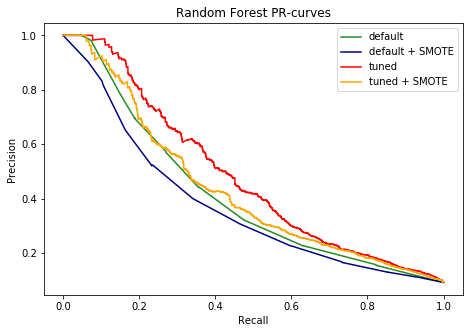

In [20]:
fig, ax = plt.subplots(figsize=(7.5,5))
ax.set_title('Random Forest PR-curves')
ax.plot(rfc_recall_default, rfc_precision_default, color='forestgreen', label='default')
ax.plot(rfc_recall_default_smt, rfc_precision_default_smt, color='navy', label='default + SMOTE')
ax.plot(rfc_recall_tuned, rfc_precision_tuned, color='red', label='tuned')
ax.plot(rfc_recall_tuned_smt, rfc_precision_tuned_smt, color='orange', label='tuned + SMOTE')
ax.set(xlabel='Recall', ylabel='Precision')
ax.legend()
